# Background on Program:

We would like to shorten our light curve to times between -1300 to +3100 seconds relative to the GRB trigger, occurring at time = 0 seconds. The rates before -1300 s and after +3100 s drop to zero and this will skew a background model. It won't interfere with the background modeling itself, because we choose to fit the polynomail to two intervals prior to and after the burst that are far from the regions of zero rates.  However, when we need to plot the background subtracted light curves, taking rate 0 - a large positive number of the background model, the plotting becomes distorted. We choose to slice out and keep only the good data inbetween those zero rate regions.

Here are a few ways to slice data based on their times.

   ---

 ### ~~~~~ BEGIN PROGRAM ~~~~~

In [1]:
from __future__ import division
from astropy.io import fits as pyfits
import numpy
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline

## Readin in data from a fits file.

Data is a spectrum with times, counts, and exposures.  Count rates per bin, of the 128 bins contained in this detector, can be calculated by summming up the counts of all the *usable* energy channels at each time bin and then dividing by the exposure (length in time of that bin).

The light curve will be count rates vs time.

In [2]:
# OUT OF 128 CHANNELS, WE ARE ONLY USING CHANNELS 4 THROUGH 125.
chmin, chmax = 4, 125 # channel cuts. 

direc       = '/Users/KimiZ/FermiData/bn090323002/'
File        ='glg_cspec_n7_bn090323002_v02.pha'
filename    = direc+File
f           = pyfits.open(filename)
trigtime    = f[0].header['TRIGTIME']
SPEC        = f['SPECTRUM']
d           = SPEC.data[(SPEC.data.field('QUALITY') == 0)] # good data
counts      = d.field('COUNTS')
times       = d.field('TIME') - trigtime   # TIME
exposures   = d.field('EXPOSURE')
N           = len(times)
rates = N * [0]
        
for j in range(N):
    if (exposures[j] > 0):
        rates[j] = counts[j][chmin:chmax+1].sum() / exposures[j]

## Set up plotting function

In [3]:
def plot_lightcurve(x, y, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    if kwargs:
        PLT = ax.step(x, y, where='post', **kwargs)
    else:
        PLT = ax.step(x, y, where='post', color='blue', linewidth=1.5, 
                      alpha=0.8)
    ax.vlines([-1300, 3100], 0, 2500, color='k', linestyle='--', lw=2)
    ax.set_title('Light curve for GRB 090323A, NaI detector: n7', 
          fontsize=16)
    ax.set_xlabel('Time Since Trigger (s)', fontsize=16)
    ax.set_ylabel('Count Rate (counts / s)', fontsize=16)
    return PLT

### Combine times and rates into an ndarray to perform time cuts.

In [4]:
data = zip(times, rates)
data = numpy.asarray(data); data # must use numpy array to do this.

array([[-4000.31370997,  1025.37235755],
       [-3996.21770999,  1040.85106745],
       [-3992.12164602,  1038.39403088],
       ..., 
       [ 3198.68065801,  1032.56982262],
       [ 3202.77671799,   530.99835438],
       [ 3206.872776  ,     0.        ]])

### We want only the data between -1300 seconds to +3100 seconds

    data[:,0] # column: 'times', rows: all rows 
    data[:,1] # column: 'rates', rows: all rows 

In [5]:
data[:,0]

array([-4000.31370997, -3996.21770999, -3992.12164602, ...,  3198.68065801,
        3202.77671799,  3206.872776  ])

In [6]:
data[:,1]

array([ 1025.37235755,  1040.85106745,  1038.39403088, ...,  1032.56982262,
         530.99835438,     0.        ])

## Slicing with conditionals:

In [7]:
cond1 = data[:,0] > -1300.0
cond2 = data[:,0] < 3100.0
data2 = data[cond1 & cond2]; data2

array([[-1296.40325603,  1530.29819634],
       [-1292.307192  ,  1472.30990715],
       [-1288.211128  ,  1488.78342881],
       ..., 
       [ 3088.08701998,   948.10359343],
       [ 3092.18308002,   965.25012756],
       [ 3096.279138  ,   960.31584664]])

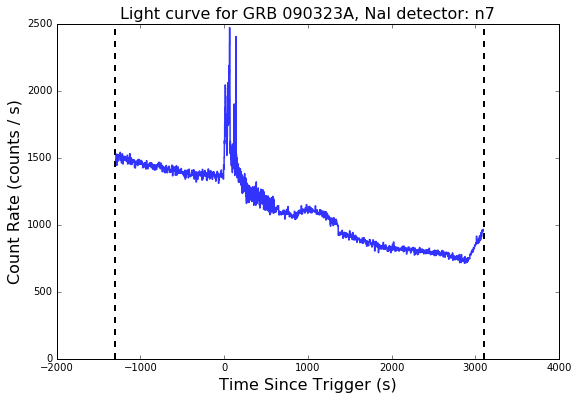

In [8]:
plt.figure(figsize=(9,6))
plot_lightcurve(data2[:,0], data2[:,1]) # times, rates

### Or, you could combine those conditionals into one step:

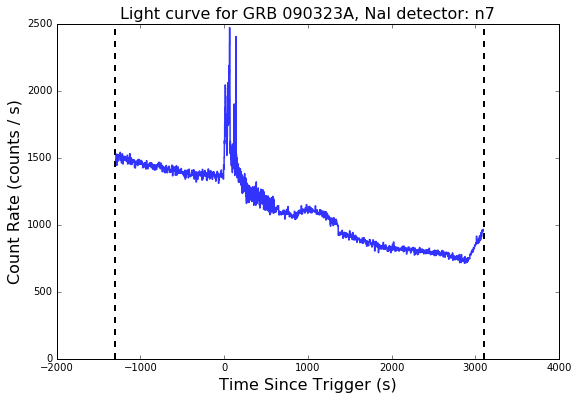

In [9]:
del data2

data2 = data[(data[:,0] > -1300.0) & (data[:,0] < 3100.0)]; data2

plt.figure(figsize=(9,6))
plot_lightcurve(data2[:,0], data2[:,1]) # times, rates

## Using:  numpy.where

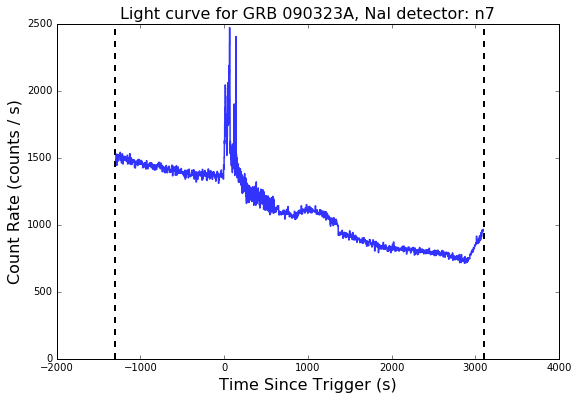

In [10]:
del data2

data2 = data[numpy.where((data[:,0] > -1300.0) & (data[:,0] < 3100.0))]

plt.figure(figsize=(9,6))
plot_lightcurve(data2[:,0], data2[:,1]) # times, rates

---

# Using Pandas DataFrames

In [11]:
import pandas as pd

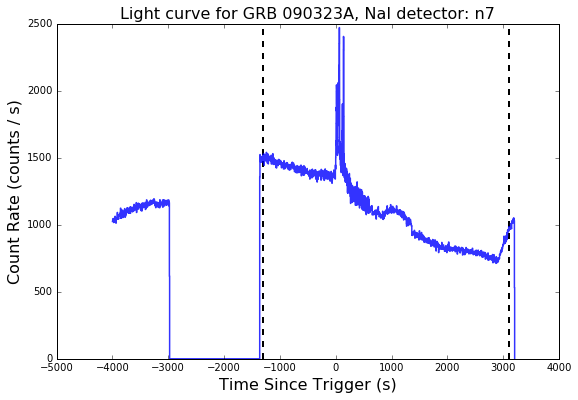

In [12]:
del data, data2

data = pd.DataFrame(zip(times, rates, exposures), 
                   columns = ['Times','Rates', 'Exposures']) 

plt.figure(figsize=(9,6))
plot_lightcurve(data.Times, data.Rates) # times, rates

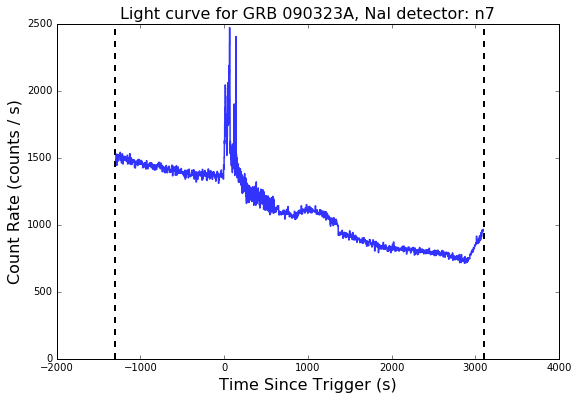

In [13]:
data2 = data[data.Times.between(-1300.0, 3100.0)]

plt.figure(figsize=(9,6))
plot_lightcurve(data2.Times, data2.Rates) # times, rates

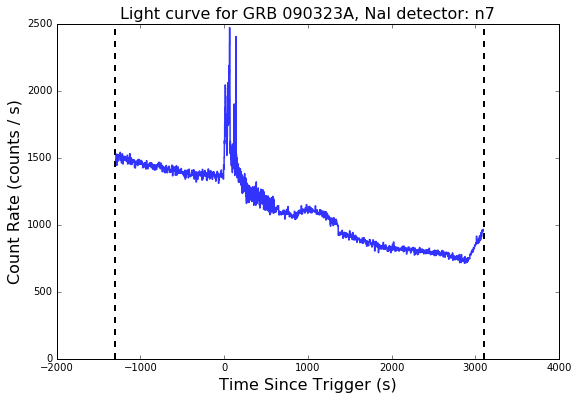

In [14]:
del data2

data2 = data[(data.Times > -1300.0) & (data.Times < 3100.0)]

plt.figure(figsize=(9,6))
plot_lightcurve(data2.Times, data2.Rates) # times, rates

---

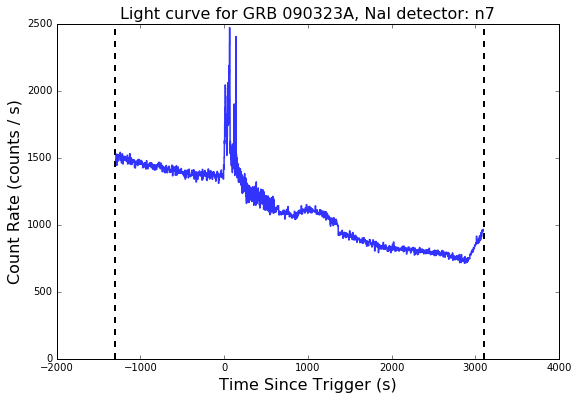

In [15]:
del data2

condition = data['Times'].map(lambda x: (x > -1300.0) and (x < 3100.0))
data2 = data[condition]

plt.figure(figsize=(9,6))
plot_lightcurve(data2.Times, data2.Rates) # times, rates